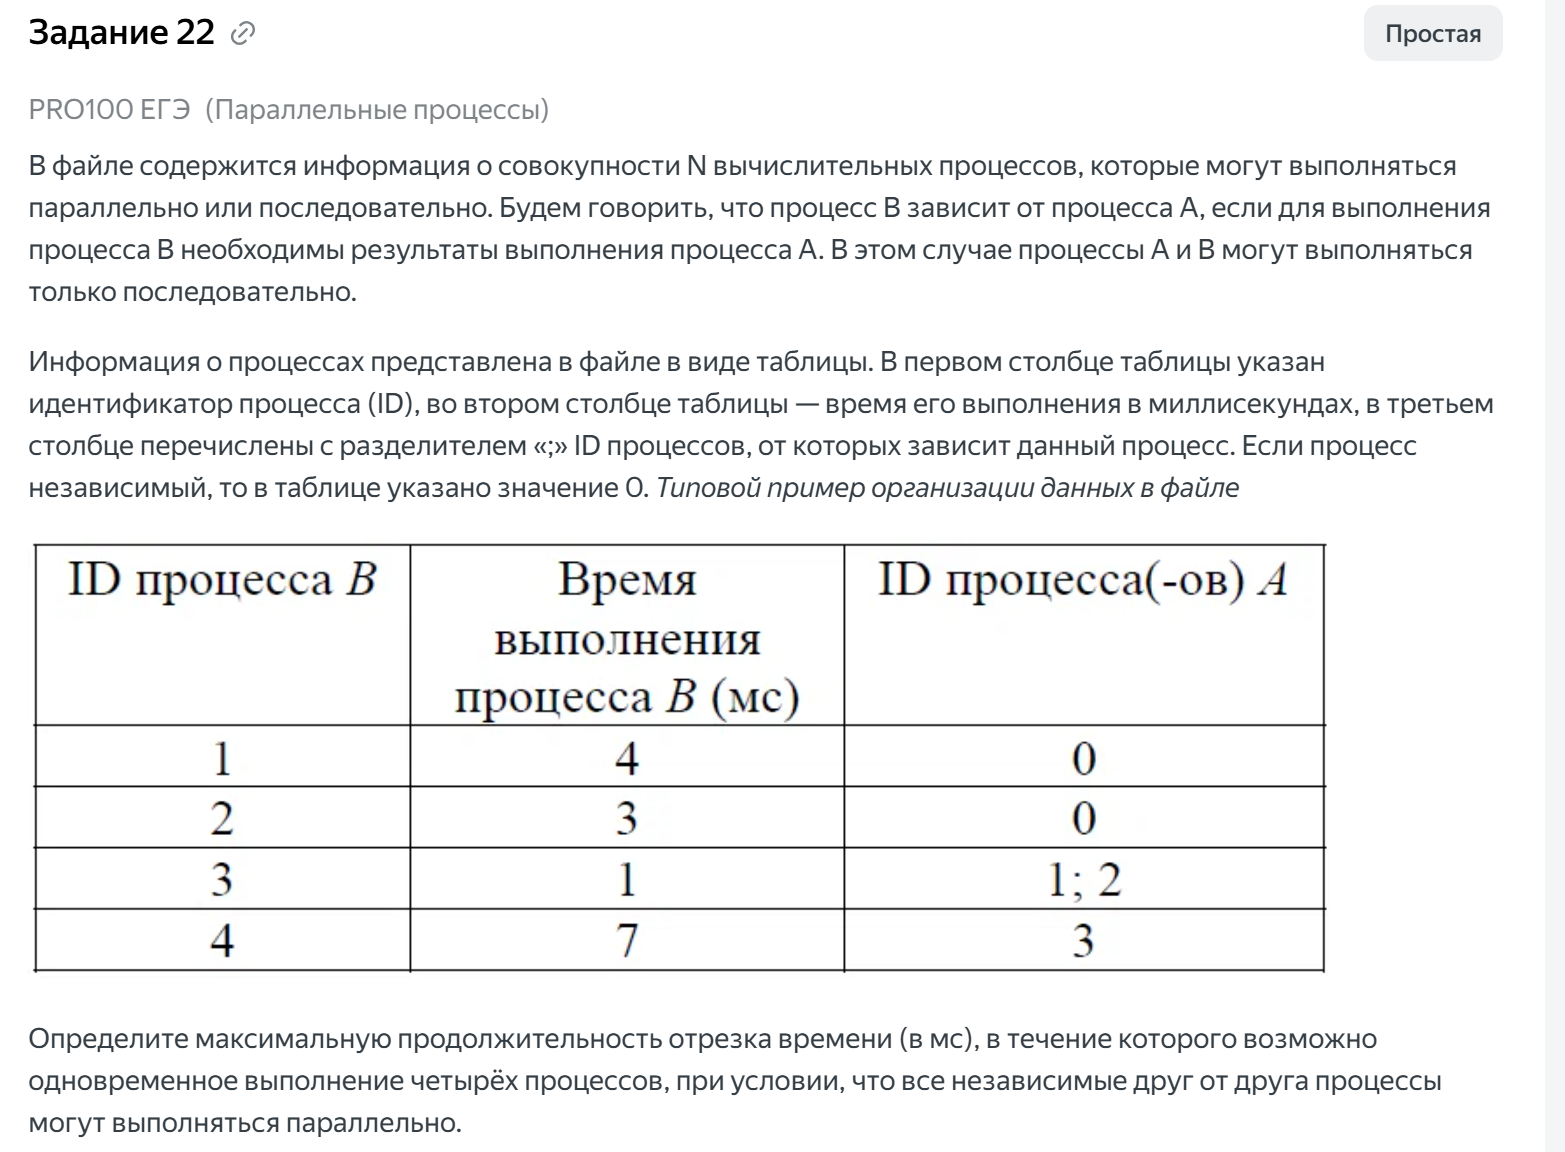

In [ ]:
f = open('22.txt')

zavis = dict() # id процесса, зависимые процессы
durations = dict() # id процесса, время исполнения 

act = dict() # id процесса -> (начало, конец)


for line in f.readlines():
    ln = line[:-1].replace('\t', ' ')

    id = int(ln.split(' ')[0])
    dur = int(ln.split(' ')[1])

    zav = []
    if ln.split(' ')[2] == '0': zav = []
    else: zav = [int(x) for x in ln.split(' ')[2].split(';')]

    durations[id] = dur
    zavis[id] = zav

print(zavis)

for id in zavis.keys():
    if zavis[id] == []: act[id] = (0, 0 + durations[id])


for id in zavis.keys():
    if all(s in act.keys() for s in zavis[id]) and zavis[id] != []:
        mx = -1
        for s in zavis[id]:
            mx = max(mx, act[s][-1])
        
        act[id] = (mx, mx + durations[id])

print(act)


zan = [0] * 33

#zan[0] = количество процессов, которые работают с [0, 1], ZAN[1] = количество процессов, которые работают с [1, 2]


mx_len = -1

for start in range(100):
    for end in range(start, 100):
        tmp_len = 0

        for id in act.keys():
            tmp_len += (act[id][0] > start and act[id][1] < end)

        mx_len = max(mx_len, tmp_len)


print(mx_len)


{1: [], 2: [], 3: [1, 2], 4: [3], 5: [3], 6: [5], 7: [4, 6], 8: [7], 9: [], 10: [], 11: [9], 12: [10], 13: [4, 6], 14: [13]}
{1: (0, 2), 2: (0, 3), 9: (0, 9), 10: (0, 8), 3: (3, 8), 4: (8, 15), 5: (8, 14), 6: (14, 19), 7: (19, 23), 8: (23, 25), 11: (9, 15), 12: (8, 11), 13: (19, 27), 14: (27, 31)}
10


In [2]:
f = open('22_1.csv', 'r')

zavis = dict() # id процесса, зависимые процессы
durations = dict() # id процесса, время исполнения 

act = dict() # id процесса -> (начало, конец)

f.readline()
for line in f.readlines():
    splt = line.replace('\n', '').replace('\"', '').split(';')

    proc_id = splt[0]
    dur = int(splt[1])
    z = splt[2:] if splt[2:] != ['0'] else []

    zavis[proc_id] = z
    durations[proc_id] = dur

for proc_id in zavis:
    if zavis[proc_id] == []: 
        act[proc_id] = (0, durations[proc_id])

for proc_id in zavis:
    if zavis[proc_id] != [] and (proc_id not in act):
        if all((pr in act) for pr in zavis[proc_id]): 
            start = max([act[pr][-1] for pr in zavis[proc_id]])
            act[proc_id] = (start, start + durations[proc_id]) 


for proc_id in zavis:
    if zavis[proc_id] != [] and (proc_id not in act):
        if all((pr in act) for pr in zavis[proc_id]): 
            start = max([act[pr][-1] for pr in zavis[proc_id]])
            act[proc_id] = (start, start + durations[proc_id]) 


print(act.keys() == zavis.keys())


len([pr for pr in act if act[pr][0] >= 100])

True


30

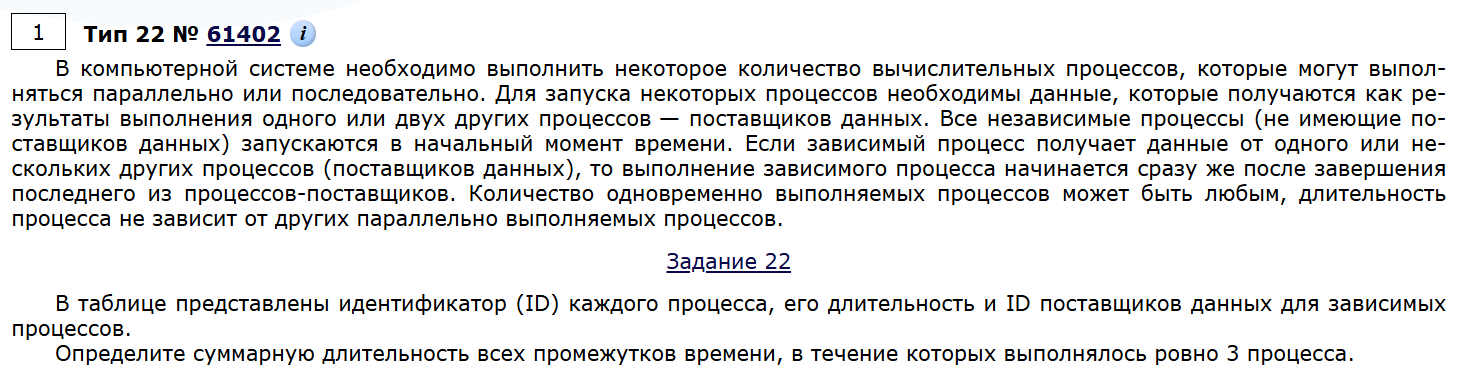

In [30]:
zav = dict()
dur = dict()
act = dict()

f = open('22_2.csv', 'r')
f.readline()

others = []

for line in f.readlines():

    splt = line.replace('\n', '').replace('\"', '').replace(' ', '').split(';')
    
    id = splt[0]
    d = int(splt[1])
    z = splt[2:] if splt[2:] != ['0'] else []

    zav[id] = z
    dur[id] = d

    if z == []:
        act[id] = {'start': 0, 'end':0 + d}
    else: 
        others.append(id)

for id in others:
    if all((pr in act) for pr in zav[id]):
        start = max(act[pr]['end'] for pr in zav[id])
        act[id] = {'start': start, 'end':start + dur[id]}

print(act.keys() == dur.keys())

arr = [0] * 100 # l[i] = колво процессов выполняющихся с i по i + 1 секунду 

print(act)
for t in range(0, 100):
    for id in act:
        if act[id]['start'] <= t and t < act[id]['end']: 
            arr[t] += 1
            
arr.count(3)


True
{'1': {'start': 0, 'end': 4}, '2': {'start': 0, 'end': 2}, '9': {'start': 0, 'end': 7}, '10': {'start': 0, 'end': 9}, '3': {'start': 4, 'end': 9}, '4': {'start': 9, 'end': 16}, '5': {'start': 9, 'end': 15}, '6': {'start': 15, 'end': 17}, '7': {'start': 17, 'end': 22}, '8': {'start': 17, 'end': 19}, '11': {'start': 7, 'end': 13}, '12': {'start': 9, 'end': 15}}


9

'sadasdb'